In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
import numpy as np
import time

In [3]:
df = pd.read_hdf('big_data.h5')
df.head()


,mean_temperature_14,mean_temperature_13,mean_temperature_12,mean_temperature_11,mean_temperature_10,mean_temperature_9,mean_temperature_8,mean_temperature_7,mean_temperature_6,mean_temperature_5,...,wind_speed_0_2,wind_speed_0_3,wind_speed_0_4,wind_speed_0_5,wind_speed_0_6,wind_speed_0_7,wind_speed_0_8,wind_speed_0_9,wind_speed_0_10,wind_speed_0_11
2,301.820000,301.871458,301.850625,300.702292,299.662292,299.835625,298.917917,299.906042,301.140417,299.718333,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
6,299.885833,299.978333,298.984167,299.562500,300.921250,300.137500,299.828750,299.030000,298.639167,297.822917,...,0.0,0.0,0.0,0.0,1.0,3.0,2.0,0.0,0.0,1.0
7,299.733542,298.048542,298.555208,297.823958,298.996667,298.486042,297.319375,298.311250,298.098125,298.106667,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,2.0,2.0,6.0
8,302.018958,301.820000,301.871458,301.850625,300.702292,299.662292,299.835625,298.917917,299.906042,301.140417,...,5.0,3.0,3.0,7.0,7.0,7.0,6.0,5.0,8.0,6.0
9,300.032500,298.790000,299.420000,298.792500,298.235417,298.437083,297.966667,298.190000,297.607500,298.117500,...,6.0,6.0,6.0,6.0,3.0,3.0,3.0,3.0,3.0,3.0


In [7]:
X = df
X = (X - X.mean())/X.std()

In [4]:
def biplot(X,n_comp,j1,j2,scale=1,alpha=0.25,s=50):
    
    import numpy as np
    import pandas as pd
    from sklearn.decomposition import PCA
    import matplotlib.pyplot as plt

    #X = (X-X.mean())/X.std()
    pca = PCA(n_components=n_comp)
    pca.fit(X)
    cols = ['PC-'+str(i+1) for i in range(n_comp)]
    Z = pca.transform(X)
    Z = pd.DataFrame(Z,columns=cols)
    Z.plot.scatter(x=j1-1,y=j2-1,
                   alpha=alpha,
                   s=s,
                   figsize=(10,10))
    sd = np.sqrt(pca.explained_variance_)
    Zj1 = sd[j1-1]*np.array([1,0])
    Zj2 = sd[j2-1]*np.array([0,1])
    plt.arrow(0,0,Zj1[0],Zj1[1],head_width=0.1,color='k')
    plt.arrow(0,0,Zj2[0],Zj2[1],head_width=0.1,color='k')

    L = pca.components_
    L = pd.DataFrame(L,index=cols,columns=X.columns)
    for k in range(X.shape[1]):
        x = scale*L.iloc[j1-1,k]
        y = scale*L.iloc[j2-1,k]
        plt.arrow(0,0,x,y,head_width=0.1,color='r')
        plt.text(1.2*x,1.2*y,X.columns[k],color='black')
        plt.xlim([-3,3])
        plt.ylim([-3,3])
        
    PVE = pca.explained_variance_ratio_
    PVE = pd.Series(PVE,index=cols)
    return PVE

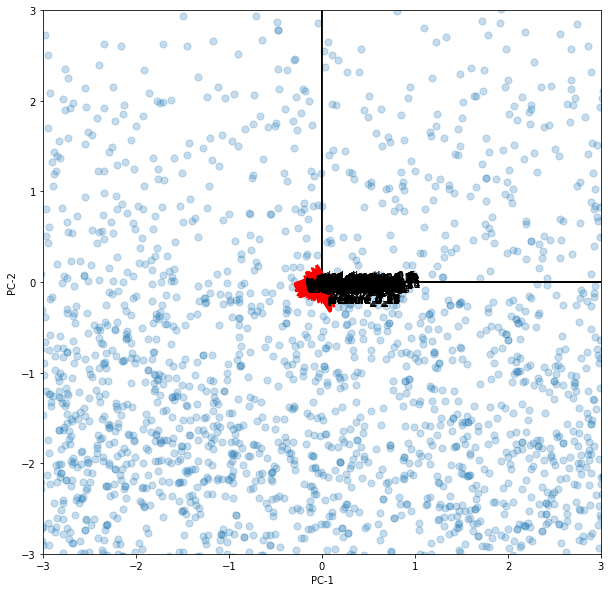

In [14]:
PVE = biplot(X, 135, 1, 2)

In [15]:
PVE

PC-1      0.294110
PC-2      0.156689
PC-3      0.111102
PC-4      0.090536
PC-5      0.044422
            ...   
PC-131    0.000056
PC-132    0.000052
PC-133    0.000047
PC-134    0.000045
PC-135    0.000041
Length: 135, dtype: float64

<AxesSubplot:>

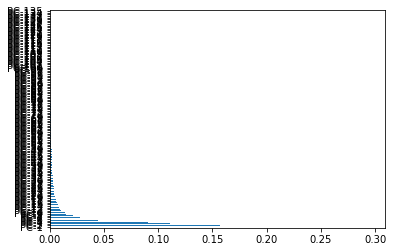

In [16]:
PVE.plot.barh()